In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [21]:
df = pd.read_csv("06smote.csv")

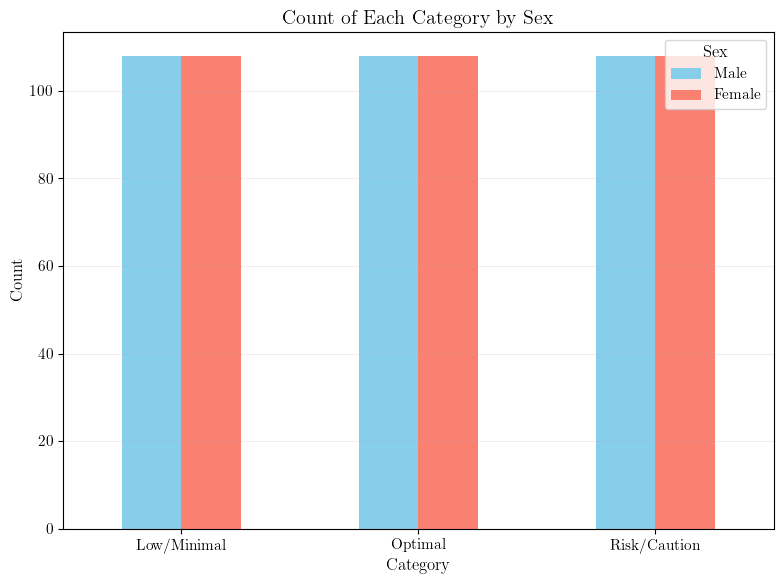

In [22]:
def plot_FATIGvsSEX(df):

    plt.rcParams.update({
        "text.usetex": True,              # If you want to use LaTeX fonts in text
        "font.family": "serif",           # IEEE uses Times New Roman-like fonts
        "font.size": 12,                   # General font size for IEEE format
        "axes.labelsize": 12,              # Axis labels font size
        "legend.fontsize": 11,             # Legend font size
        "xtick.labelsize": 11,             # X-axis tick labels font size
        "ytick.labelsize": 11,             # Y-axis tick labels font size
        "figure.figsize": (5, 5*0.8),
        "savefig.dpi": 1200,               # DPI for high-quality PNG/JPEG
    })

    contagem = pd.crosstab(df["FatigInd"], df["Sex_F"])
    # Plot the chart with bars separated by Sex_F
    contagem.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'], figsize=(8, 6))
    plt.title('Count of Each Category by Sex')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.legend(['Male', 'Female'], title='Sex')
    plt.grid(axis='y', alpha=0.2)
    plt.xticks(rotation=0)
    plt.tight_layout()
    #plt.savefig('FATIGvsSEX.png')
    plt.show()

plot_FATIGvsSEX(df)

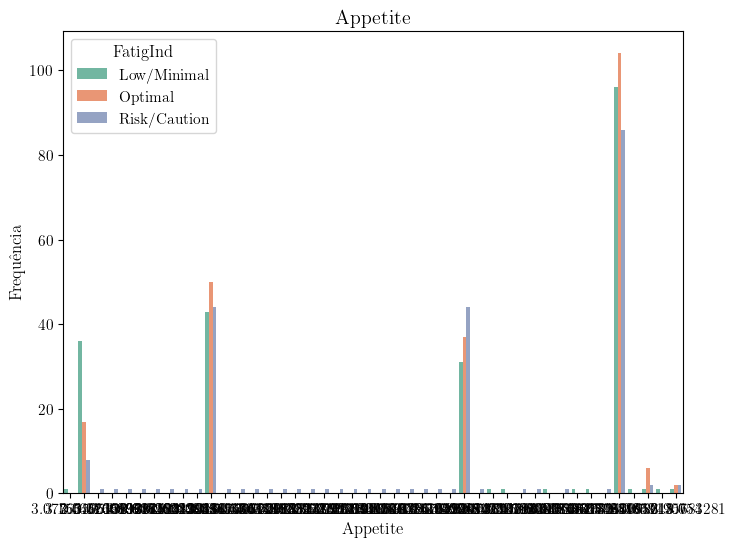

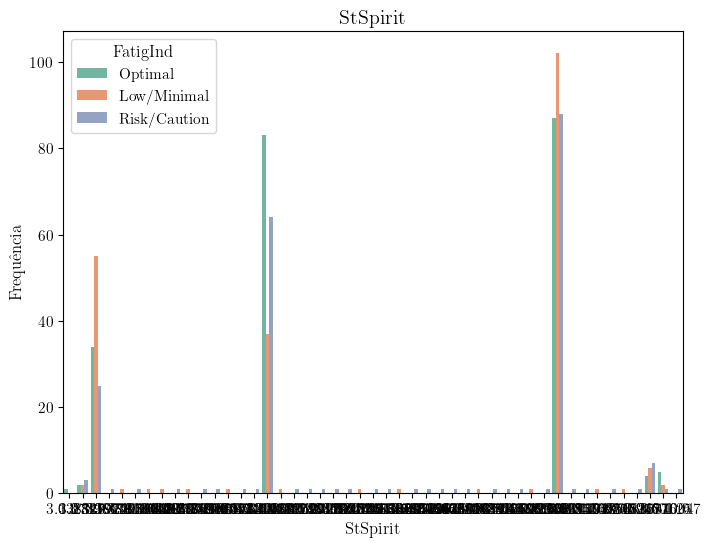

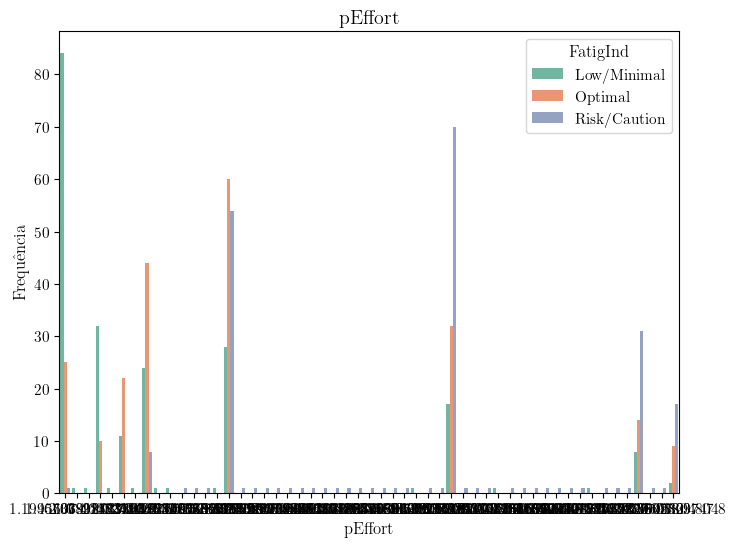

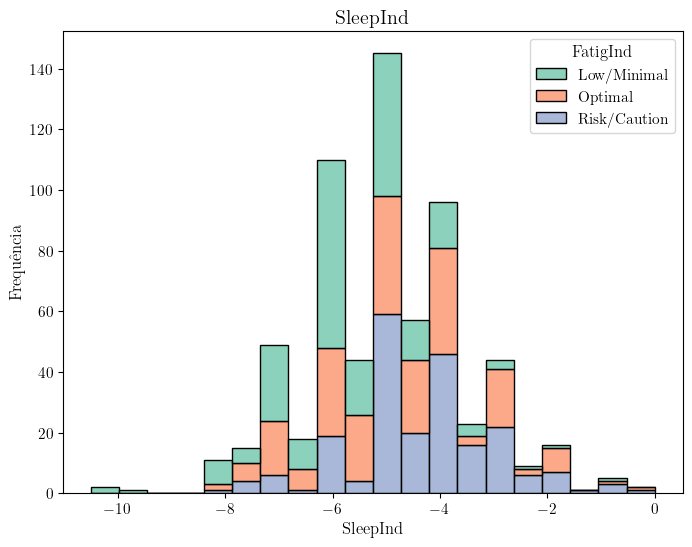

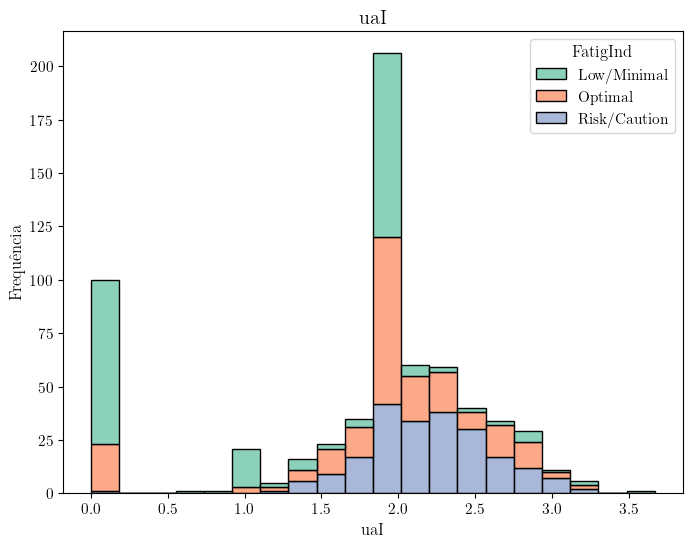

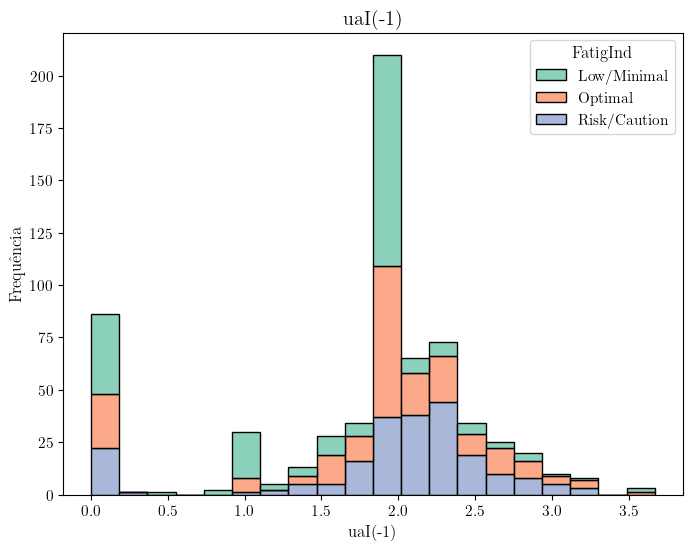

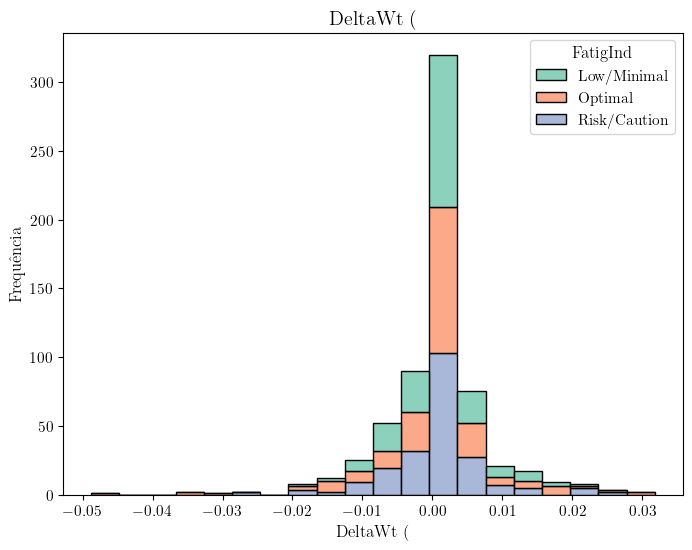

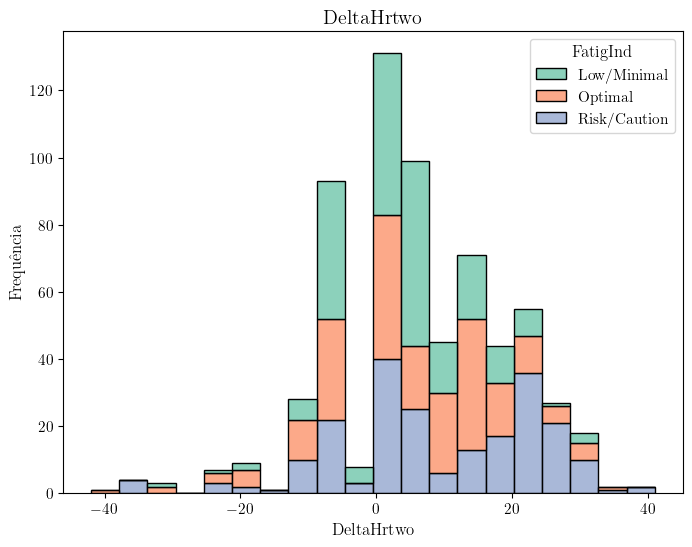

In [23]:
def plot_FATIGvsVARS(dfGB):
    for cc in ['Appetite', 'StSpirit', 'pEffort']:

        # Criando o gráfico de barras com base em 'Appetite' e 'FatigInd'
        plt.figure(figsize=(8,6))
        sns.countplot(data=dfGB, x=cc, hue='FatigInd', palette='Set2')

        # Adicionando título e rótulos
        plt.title(f"{cc}")
        plt.xlabel(f'{cc}')
        plt.ylabel('Frequência')

        # Exibindo o gráfico
        plt.show()

    for cc in ['SleepInd','uaI', 'uaI(-1)', 'DeltaWt (%)', 'DeltaHrtwo']:

        # Criando o gráfico de barras com base em 'Appetite' e 'FatigInd'
        plt.figure(figsize=(8,6))
        sns.histplot(data=dfGB, x=cc, hue='FatigInd', palette='Set2', bins=20, kde=False,multiple='stack')

        # Adicionando título e rótulos
        plt.title(f"{cc}")
        plt.xlabel(f'{cc}')
        plt.ylabel('Frequência')

        # Exibindo o gráfico
        plt.show()

plot_FATIGvsVARS(df)

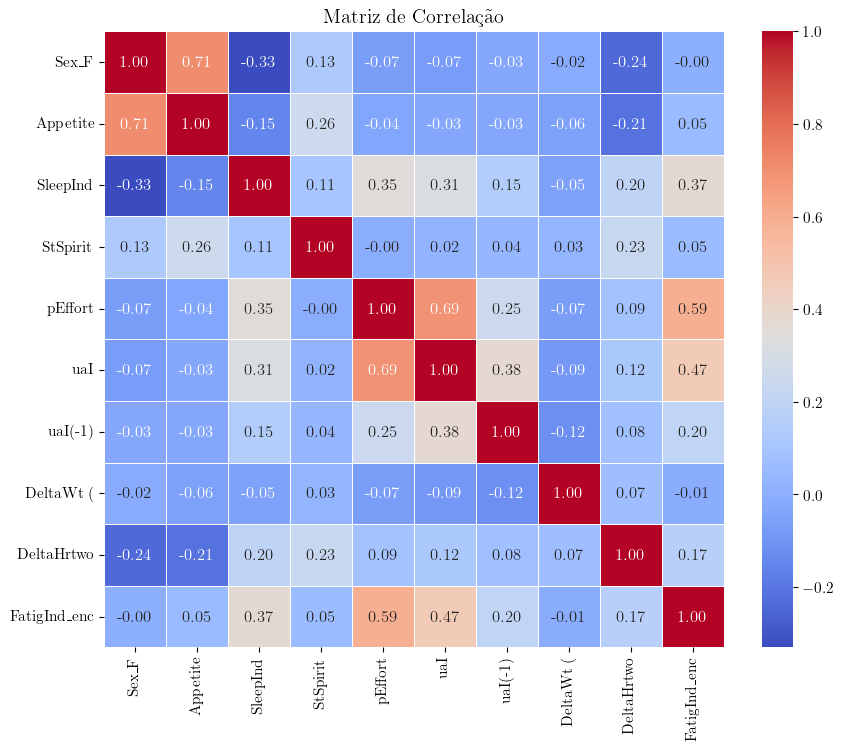

In [24]:
def plot_correlation(df):
       df_corr = df.copy()
       df_corr = df_corr[['Sex_F', 'Appetite', 'SleepInd', 'StSpirit', 'pEffort',
              'uaI', 'uaI(-1)', 'DeltaWt (%)', 'DeltaHrtwo', 'FatigInd']]
              
       # Codificar a variável target (se ela for categórica)
       # Suponha que 'target' seja a variável categórica
       encoder = LabelEncoder()
       df_corr['FatigInd_enc'] = encoder.fit_transform(df_corr['FatigInd'])

       # Selecione apenas as variáveis numéricas para calcular a correlação
       df_numeric = df_corr.select_dtypes(include=['float64', 'int64'])

       # Adicione a variável target codificada para análise de correlação
       df_numeric['FatigInd_enc'] = df_corr['FatigInd_enc']

       # Calcular a matriz de correlação
       corr_matrix = df_numeric.corr()

       # Plotando o heatmap
       plt.figure(figsize=(10, 8))
       sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
       plt.title("Matriz de Correlação")
       plt.show()

plot_correlation(df)

In [25]:
df02 = df[["SleepInd", "pEffort", "uaI", "uaI(-1)", "DeltaHrtwo", "FatigInd"]]
df02

,SleepInd,pEffort,uaI,uaI(-1),DeltaHrtwo,FatigInd
0,-6.0,1.0,0.00,1.00,-6.0,Low/Minimal
1,-5.5,5.0,2.44,1.89,19.0,Low/Minimal
2,-6.0,1.0,1.00,0.00,12.0,Low/Minimal
3,-5.0,2.0,1.16,1.56,-6.0,Low/Minimal
4,-5.0,2.0,2.91,2.00,6.0,Low/Minimal
...,...,...,...,...,...,...
643,-4.0,6.0,2.17,3.00,12.0,Risk/Caution
644,-3.5,5.0,2.33,2.30,-6.0,Risk/Caution
645,-4.5,5.0,2.25,2.48,-18.0,Risk/Caution
646,-5.0,6.0,2.49,1.69,18.0,Risk/Caution


In [26]:
df02.to_csv("06smote_FEAUTURES.csv", index=False)